In [1]:
# importing dependencies
import pandas as pd
import numpy as np
from scipy import stats
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import scipy.stats as st
import pgeocode
import geopandas as gpd
import geoplot

In [2]:
#connect local database

connection_string = "./Resources/Evictions.sqlite"
engine = create_engine(f"sqlite:///{connection_string}")

In [3]:
combined_df = pd.read_sql_query('SELECT * FROM "EvictionDemographics"', con=engine)
combined_df.head()

,Total Evictions,ZIPCODE,COUNT PARTICIPANTS,PERCENT FEMALE,PERCENT MALE,PERCENT PACIFIC ISLANDER,PERCENT HISPANIC LATINO,PERCENT AMERICAN INDIAN,PERCENT ASIAN NON HISPANIC,PERCENT WHITE NON HISPANIC,PERCENT BLACK NON HISPANIC,PERCENT OTHER ETHNICITY,PERCENT ETHNICITY UNKNOWN,PERCENT PERMANENT RESIDENT ALIEN,PERCENT US CITIZEN,PERCENT OTHER CITIZEN STATUS,PERCENT RECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,PERCENT MINORITY
0,421,11230,248,0.78,0.22,0.0,0.00,0.00,0.03,0.87,0.01,0.07,0.02,0.01,0.99,0.00,0.17,0.83,0.11
1,209,11219,214,0.85,0.15,0.0,0.00,0.00,0.00,0.96,0.00,0.03,0.00,0.01,0.99,0.00,0.52,0.48,0.03
2,238,11218,111,0.87,0.13,0.0,0.01,0.00,0.03,0.86,0.05,0.05,0.00,0.07,0.92,0.01,0.46,0.54,0.14
3,318,11223,109,0.49,0.51,0.0,0.01,0.00,0.06,0.87,0.01,0.05,0.00,0.06,0.94,0.01,0.18,0.82,0.13
4,1896,10467,106,0.61,0.39,0.0,0.48,0.01,0.04,0.01,0.44,0.02,0.00,0.09,0.89,0.02,0.31,0.69,0.99


The r-value is : -0.19048661630513092
The p-value is : 0.3133220932064391


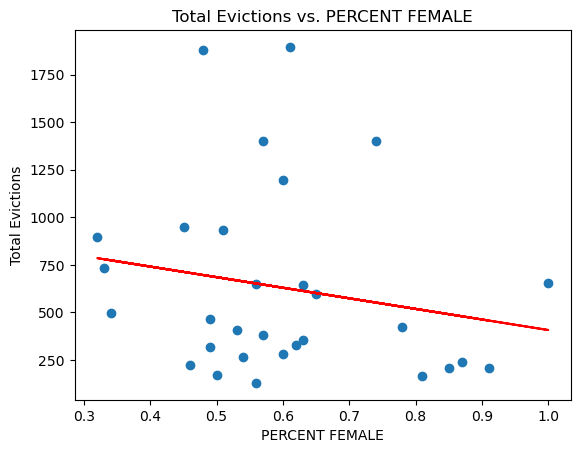

In [4]:
# Total Evictions vs. PERCENT FEMALE

def linear_regression(x,y):
    print(f"The r-value is : {(st.pearsonr(x, y)[0])}")
    print(f"The p-value is : {(st.pearsonr(x, y)[1])}")
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
 
fig1, ax1 = plt.subplots()

equation = linear_regression(combined_df['PERCENT FEMALE'], combined_df['Total Evictions'])
annotate(equation, 0, -3)
 
plt.xlabel('PERCENT FEMALE')
plt.ylabel('Total Evictions')
plt.title("Total Evictions vs. PERCENT FEMALE")

plt.show()

The r-value is : 0.19048661630513086
The p-value is : 0.3133220932064391


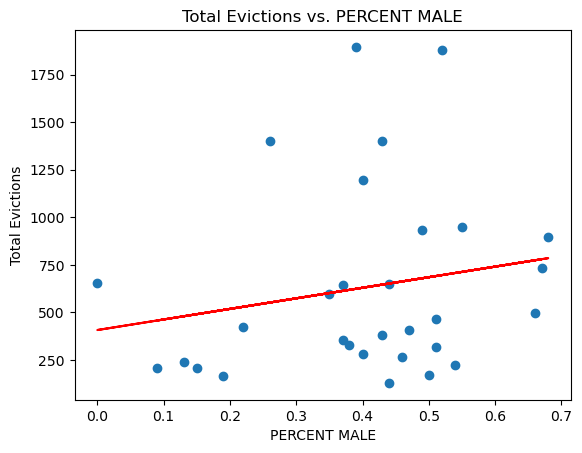

In [5]:
# Total Evictions vs. PERCENT MALE

def linear_regression(x,y):
    print(f"The r-value is : {(st.pearsonr(x, y)[0])}")
    print(f"The p-value is : {(st.pearsonr(x, y)[1])}")
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

fig1, ax1 = plt.subplots()

equation = linear_regression(combined_df['PERCENT MALE'], combined_df['Total Evictions'])
annotate(equation, 0, -3)
 
plt.xlabel('PERCENT MALE')
plt.ylabel('Total Evictions')
plt.title("Total Evictions vs. PERCENT MALE")

plt.show()

The r-value is : -0.30607054929607647
The p-value is : 0.09998374947834762


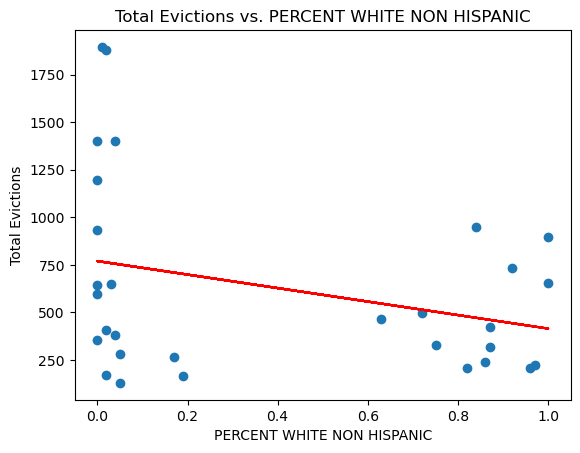

In [6]:
# Total Evictions vs. PERCENT WHITE NON HISPANIC

def linear_regression(x,y):
    print(f"The r-value is : {(st.pearsonr(x, y)[0])}")
    print(f"The p-value is : {(st.pearsonr(x, y)[1])}")
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

fig1, ax1 = plt.subplots()

equation = linear_regression(combined_df['PERCENT WHITE NON HISPANIC'], combined_df['Total Evictions'])
annotate(equation, 0, -3)
 
plt.xlabel('PERCENT WHITE NON HISPANIC')
plt.ylabel('Total Evictions')
plt.title("Total Evictions vs. PERCENT WHITE NON HISPANIC")

plt.show()

The r-value is : 0.30210736764298535
The p-value is : 0.10468150383627021


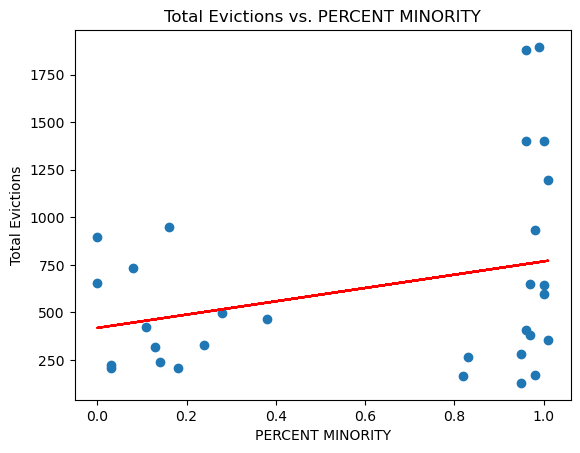

In [7]:
# Total Evictions vs PERCENT MINORITY

def linear_regression(x,y):
    print(f"The r-value is : {(st.pearsonr(x, y)[0])}")
    print(f"The p-value is : {(st.pearsonr(x, y)[1])}")
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

fig1, ax1 = plt.subplots()

equation = linear_regression(combined_df['PERCENT MINORITY'], combined_df['Total Evictions'])
annotate(equation, 0, -3)
 
plt.xlabel('PERCENT MINORITY')
plt.ylabel('Total Evictions')
plt.title("Total Evictions vs. PERCENT MINORITY")

plt.show()

The r-value is : -0.04541731404874569
The p-value is : 0.8116380190852883


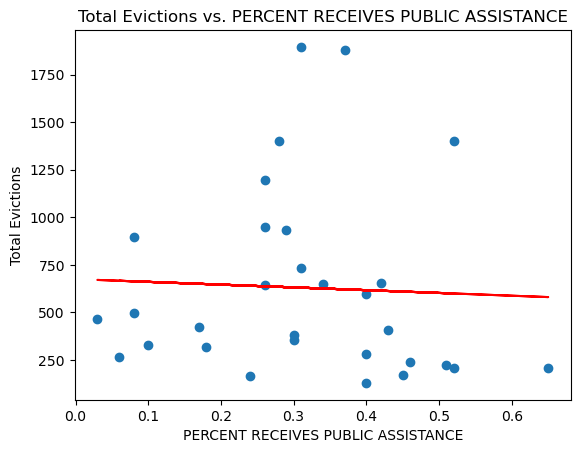

In [8]:
# Total Evictions vs. PECENT RECIEVES PUBLIC ASSISTANCE

def linear_regression(x,y):
    print(f"The r-value is : {(st.pearsonr(x, y)[0])}")
    print(f"The p-value is : {(st.pearsonr(x, y)[1])}")
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

fig1, ax1 = plt.subplots()

equation = linear_regression(combined_df['PERCENT RECEIVES PUBLIC ASSISTANCE'], combined_df['Total Evictions'])
annotate(equation, 0, -3)
 
plt.xlabel('PERCENT RECEIVES PUBLIC ASSISTANCE')
plt.ylabel('Total Evictions')
plt.title("Total Evictions vs. PERCENT RECEIVES PUBLIC ASSISTANCE")

plt.show()

The r-value is : 0.04541731404874571
The p-value is : 0.8116380190852883


Text(0.5, 1.0, 'Total Evictions vs. PERCENT NRECEIVES PUBLIC ASSISTANCE')

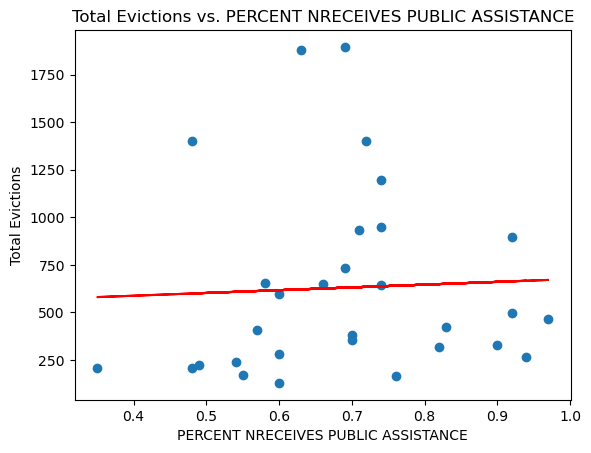

In [9]:
# Total Evictions vs. PERCENT NRECIEVES PUBLIC ASSISTANCE

def linear_regression(x,y):
    print(f"The r-value is : {(st.pearsonr(x, y)[0])}")
    print(f"The p-value is : {(st.pearsonr(x, y)[1])}")
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

fig1, ax1 = plt.subplots()

equation = linear_regression(combined_df['PERCENT NRECEIVES PUBLIC ASSISTANCE'], combined_df['Total Evictions'])
annotate(equation, 0, -3)
 
plt.xlabel('PERCENT NRECEIVES PUBLIC ASSISTANCE')
plt.ylabel('Total Evictions')
plt.title("Total Evictions vs. PERCENT NRECEIVES PUBLIC ASSISTANCE")


In [10]:
# Set up dataset for map graph
# Change zip code to string
combined_df['ZIPCODE'] = combined_df['ZIPCODE'].astype(str)

In [11]:
#Pull postal codes from the US and their associated coordinates
nomi = pgeocode.Nominatim('us')

# Calculate latitude and longitude based on zip code
combined_df['Latitude'] = (nomi.query_postal_code(combined_df['ZIPCODE'].tolist()).latitude)
combined_df['Longitude'] = (nomi.query_postal_code(combined_df['ZIPCODE'].tolist()).longitude)

In [12]:
# Calculate the number of minorities projected to be evicted based on minority percentage of each area
n_minority = combined_df["Total Evictions"]*combined_df["PERCENT MINORITY"]
combined_df['N_Minority'] = n_minority

combined_df.head(5)

,Total Evictions,ZIPCODE,COUNT PARTICIPANTS,PERCENT FEMALE,PERCENT MALE,PERCENT PACIFIC ISLANDER,PERCENT HISPANIC LATINO,PERCENT AMERICAN INDIAN,PERCENT ASIAN NON HISPANIC,PERCENT WHITE NON HISPANIC,...,PERCENT ETHNICITY UNKNOWN,PERCENT PERMANENT RESIDENT ALIEN,PERCENT US CITIZEN,PERCENT OTHER CITIZEN STATUS,PERCENT RECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,PERCENT MINORITY,Latitude,Longitude,N_Minority
0,421,11230,248,0.78,0.22,0.0,0.00,0.00,0.03,0.87,...,0.02,0.01,0.99,0.00,0.17,0.83,0.11,40.6225,-73.9650,46.31
1,209,11219,214,0.85,0.15,0.0,0.00,0.00,0.00,0.96,...,0.00,0.01,0.99,0.00,0.52,0.48,0.03,40.6336,-73.9960,6.27
2,238,11218,111,0.87,0.13,0.0,0.01,0.00,0.03,0.86,...,0.00,0.07,0.92,0.01,0.46,0.54,0.14,40.6424,-73.9758,33.32
3,318,11223,109,0.49,0.51,0.0,0.01,0.00,0.06,0.87,...,0.00,0.06,0.94,0.01,0.18,0.82,0.13,40.5979,-73.9743,41.34
4,1896,10467,106,0.61,0.39,0.0,0.48,0.01,0.04,0.01,...,0.00,0.09,0.89,0.02,0.31,0.69,0.99,40.8737,-73.8712,1877.04


In [13]:
import warnings
warnings.filterwarnings('ignore')

# Set the Coordinate Reference System (CRS) to the WGS84 (epsg:4326) latitude-longitude projection 
# fyi: CRS tells Python how coordinates relate to places on the Earth
#      https://spatialreference.org/ref/epsg/4326/
#      https://en.wikipedia.org/wiki/World_Geodetic_System
crs={'init':'epsg:4326'}

# Grab the data for NYC bou
boroughs = gpd.read_file(geoplot.datasets.get_path('nyc_boroughs'))

# Create a GeoDataFrame using the zip code coordinates
geo_df=gpd.GeoDataFrame(combined_df,crs=crs,geometry=gpd.points_from_xy(combined_df['Longitude'], combined_df['Latitude']))

# Check dataframe
geo_df.head(5)

/Users/tifanibiro/Documents/MossRehab/Bootcamp/Classes/.conda/lib/python3.10/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)
/Users/tifanibiro/Documents/MossRehab/Bootcamp/Classes/.conda/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Total Evictions,ZIPCODE,COUNT PARTICIPANTS,PERCENT FEMALE,PERCENT MALE,PERCENT PACIFIC ISLANDER,PERCENT HISPANIC LATINO,PERCENT AMERICAN INDIAN,PERCENT ASIAN NON HISPANIC,PERCENT WHITE NON HISPANIC,...,PERCENT PERMANENT RESIDENT ALIEN,PERCENT US CITIZEN,PERCENT OTHER CITIZEN STATUS,PERCENT RECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,PERCENT MINORITY,Latitude,Longitude,N_Minority,geometry
0,421,11230,248,0.78,0.22,0.0,0.00,0.00,0.03,0.87,...,0.01,0.99,0.00,0.17,0.83,0.11,40.6225,-73.9650,46.31,POINT (-73.96500 40.62250)
1,209,11219,214,0.85,0.15,0.0,0.00,0.00,0.00,0.96,...,0.01,0.99,0.00,0.52,0.48,0.03,40.6336,-73.9960,6.27,POINT (-73.99600 40.63360)
2,238,11218,111,0.87,0.13,0.0,0.01,0.00,0.03,0.86,...,0.07,0.92,0.01,0.46,0.54,0.14,40.6424,-73.9758,33.32,POINT (-73.97580 40.64240)
3,318,11223,109,0.49,0.51,0.0,0.01,0.00,0.06,0.87,...,0.06,0.94,0.01,0.18,0.82,0.13,40.5979,-73.9743,41.34,POINT (-73.97430 40.59790)
4,1896,10467,106,0.61,0.39,0.0,0.48,0.01,0.04,0.01,...,0.09,0.89,0.02,0.31,0.69,0.99,40.8737,-73.8712,1877.04,POINT (-73.87120 40.87370)


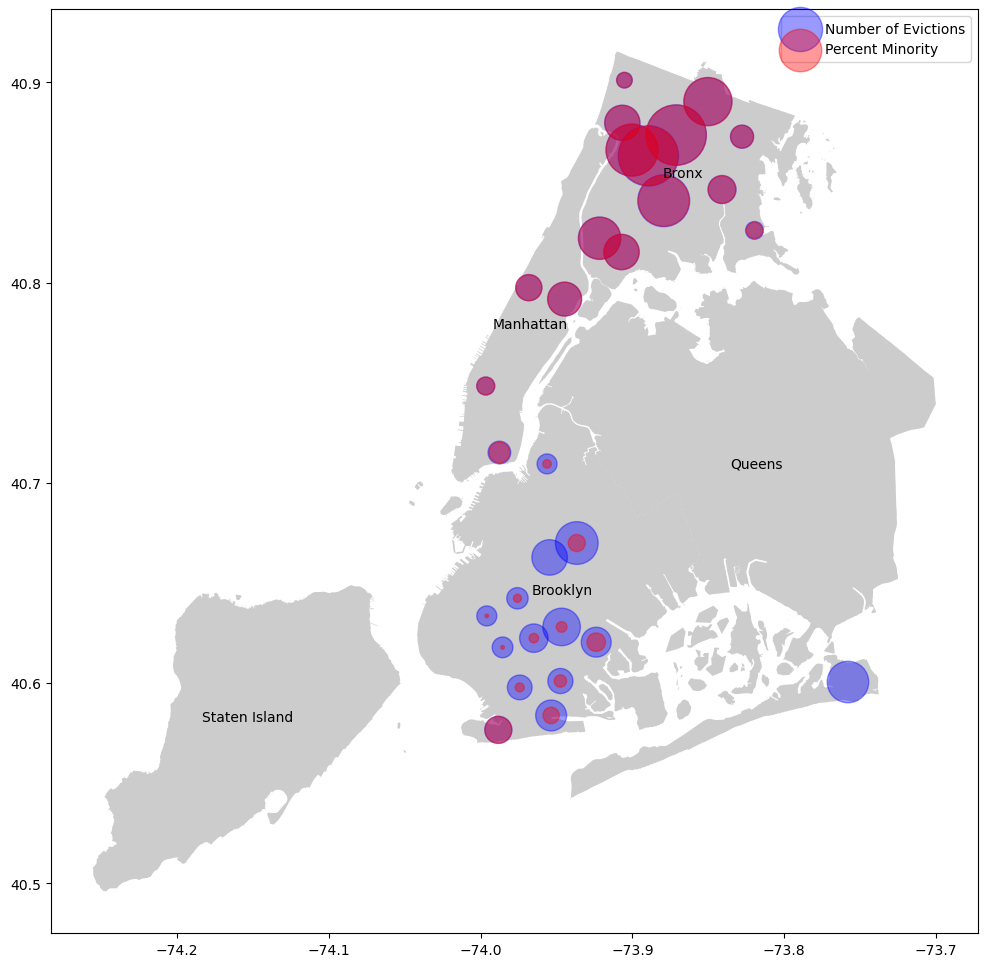

In [18]:
# Set plot size parameters
fig,ax=plt.subplots(figsize=(12,12))

# Plot NYC map
boroughs.apply(lambda x: ax.annotate(text=x['BoroName'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
boroughs.plot(ax=ax,alpha=0.4,color="grey")

# Plot evictions data as blue points
geo_df.plot("Total Evictions",ax=ax, markersize="Total Evictions", color="blue", alpha=0.4, label="Number of Evictions")

# Plot percentage of projected demographic of evicted based on reported demographics of area 
geo_df.plot("N_Minority",ax=ax, markersize="N_Minority", color="red", alpha=0.4, label="Percent Minority")
    
plt.legend()